Location            1001        1002                    1005
Year                2021        2021        2022        2021
Hourly Index                                                
0             422.374743  359.372305  314.988598  153.057506
1             342.165737  402.122132  322.623003  153.221049
2             244.219343  398.742659  332.197124  153.249601


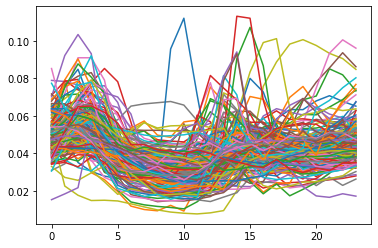

[[0.06064118 0.04912541 0.03506305 ... 0.07077097 0.0677747  0.0651955 ]
 [0.04916664 0.05501536 0.054553   ... 0.05126759 0.05012984 0.0516641 ]
 [0.05681772 0.05819482 0.0599218  ... 0.0550309  0.05252371 0.05556239]
 ...
 [0.04847522 0.05430779 0.05528616 ... 0.0472893  0.04285485 0.0454361 ]
 [0.05397738 0.05433389 0.05164474 ... 0.05105884 0.05108754 0.04730657]
 [0.0518374  0.05407014 0.05295634 ... 0.05075553 0.05085915 0.0519121 ]]


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

from Navajo_Load_Profiles_Functions import *


folders = create_folders()

avg_load_profiles_df = pd.read_csv(f"{folders['Aggregated Load Profiles']}\\Avg Weekday Load Profiles.csv", index_col=[0], header=[0, 1])
hourly_load_profiles_df = calc_hourly_df(avg_load_profiles_df)
hourly_load_profiles_df = hourly_load_profiles_df.loc[:, (hourly_load_profiles_df >= 0).all()]  # crop out cols with negatives
hourly_load_profiles_df = hourly_load_profiles_df.loc[:, (hourly_load_profiles_df.columns != ('1089', '2021'))]# & (hourly_load_profiles_df.columns != ('1041', '2021'))]
print(hourly_load_profiles_df.iloc[:3, :4])

X = hourly_load_profiles_df.loc[:, hourly_load_profiles_df.columns].values
X = X.T
X_norm = sklearn.preprocessing.normalize(X, norm='l1', axis=1)
plt.plot(X_norm.T)
plt.show()
print(X_norm)

C:\Users\soshe\AppData\Local\Temp/ipykernel_2960/2864797429.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
C:\Users\soshe\AppData\Local\Temp/ipykernel_2960/2864797429.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')


Num vals in 0: 13


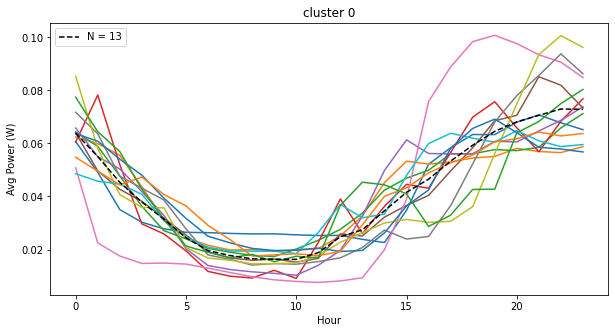

Num vals in 1: 17


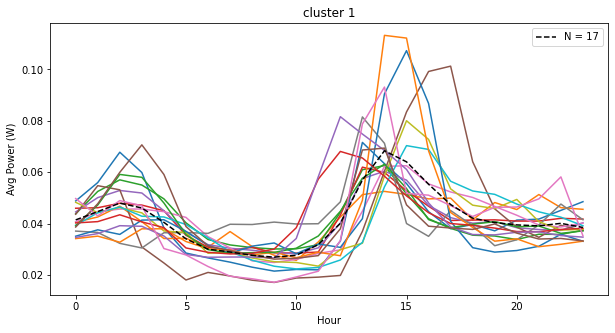

Num vals in 2: 21


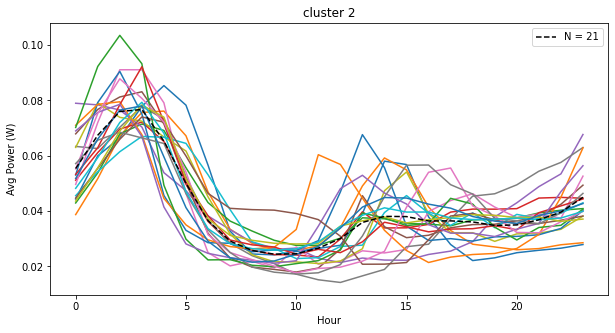

Num vals in 3: 45


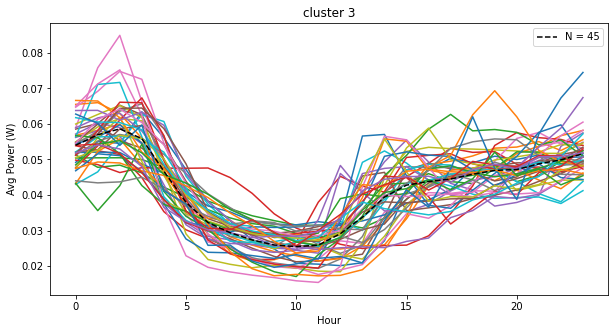

Num vals in 4: 69


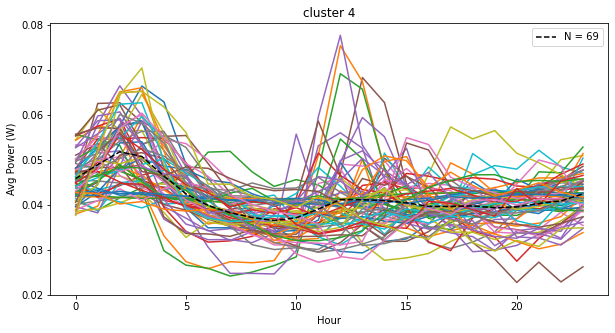

Num vals in 5: 13


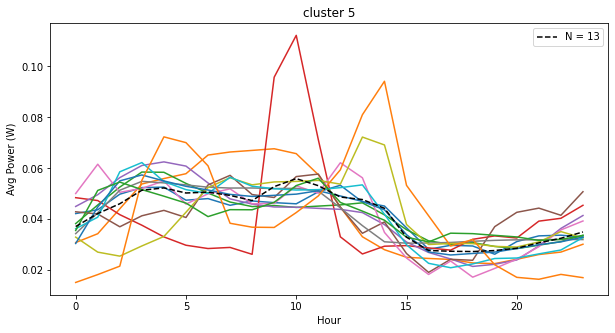

In [11]:
# Plot all lines in each cluster with cluster centers
n_clusters = 6
km = KMeans(n_clusters=n_clusters, init='random', n_init=30, max_iter=500, random_state=0)
y_km = km.fit_predict(X_norm)

silscore_by_cluster = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
test = pd.Series(index=sorted(set(km.labels_)), name='Cluster #')
silsample_scores = metrics.silhouette_samples(X_norm, km.labels_)

for cluster_num in range(n_clusters):
    # silsample_score[cluster_num] = metrics.silhouette_samples(X_norm[km.labels_ == cluster_num], km.labels_[km.labels_ == cluster_num])
    silscore_by_cluster[cluster_num] = np.mean(silsample_scores[km.labels_ == cluster_num])

    plt.figure(figsize=(10,5))
    print(f"Num vals in {cluster_num}: {sum(km.labels_ == cluster_num)}")
    plt.plot(X_norm[km.labels_ == cluster_num].T)

    plt.plot(km.cluster_centers_[cluster_num], linestyle='--', color='k', label=f"N = {sum(km.labels_ == cluster_num)}")

    plt.title(f"cluster {cluster_num}")
    plt.legend()
    plt.ylabel("Avg Power (W)")
    plt.xlabel("Hour")
    # plt.ax
    plt.show()

Num vals in 0: 88
Num vals in 1: 18
Num vals in 2: 72


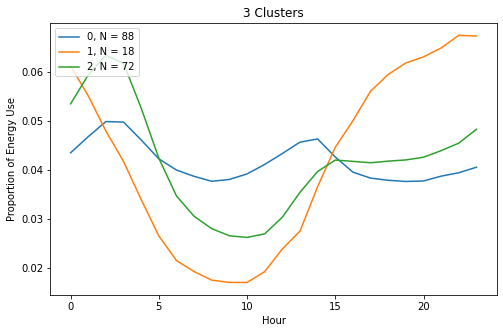

Num vals in 0: 72
Num vals in 1: 16
Num vals in 2: 37
Num vals in 3: 53


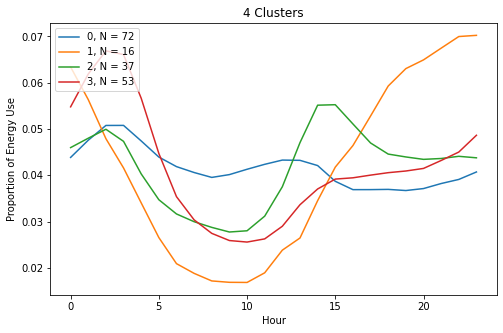

Num vals in 0: 40
Num vals in 1: 23
Num vals in 2: 18
Num vals in 3: 81
Num vals in 4: 16


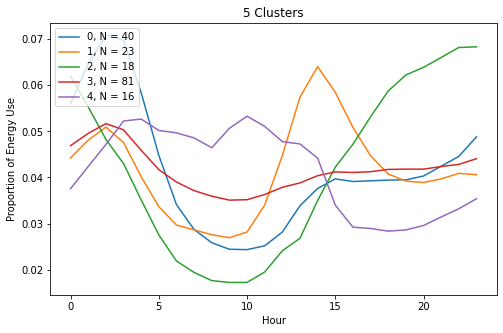

Num vals in 0: 13
Num vals in 1: 17
Num vals in 2: 21
Num vals in 3: 45
Num vals in 4: 69
Num vals in 5: 13


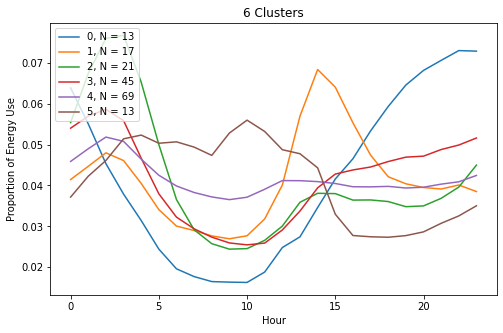

Num vals in 0: 15
Num vals in 1: 7
Num vals in 2: 60
Num vals in 3: 25
Num vals in 4: 18
Num vals in 5: 40
Num vals in 6: 13


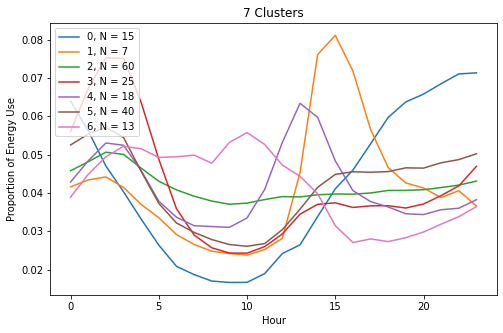

Num vals in 0: 11
Num vals in 1: 7
Num vals in 2: 17
Num vals in 3: 36
Num vals in 4: 54
Num vals in 5: 13
Num vals in 6: 21
Num vals in 7: 19


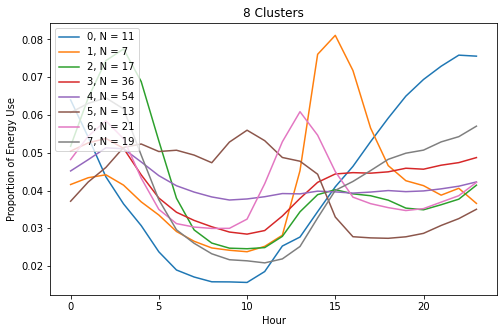

Num vals in 0: 37
Num vals in 1: 13
Num vals in 2: 7
Num vals in 3: 30
Num vals in 4: 27
Num vals in 5: 17
Num vals in 6: 19
Num vals in 7: 12
Num vals in 8: 16


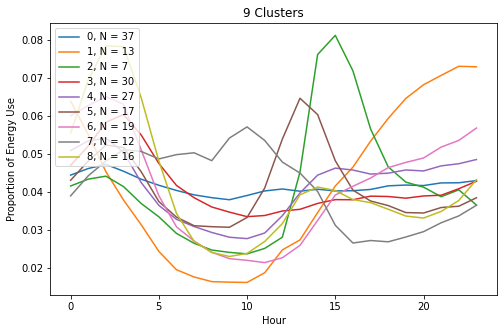

Num vals in 0: 12
Num vals in 1: 7
Num vals in 2: 17
Num vals in 3: 33
Num vals in 4: 47
Num vals in 5: 13
Num vals in 6: 22
Num vals in 7: 14
Num vals in 8: 12
Num vals in 9: 1


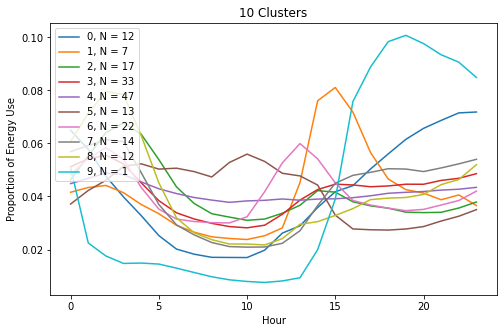

Num vals in 0: 15
Num vals in 1: 12
Num vals in 2: 32
Num vals in 3: 8
Num vals in 4: 1
Num vals in 5: 47
Num vals in 6: 17
Num vals in 7: 15
Num vals in 8: 7
Num vals in 9: 12
Num vals in 10: 12


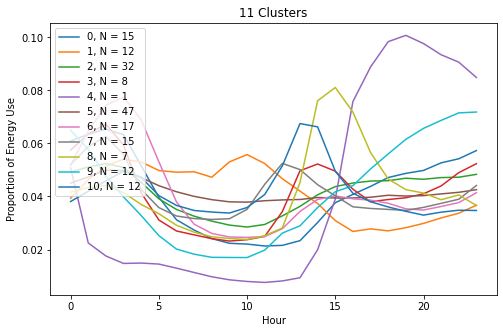

Num vals in 0: 4
Num vals in 1: 1
Num vals in 2: 33
Num vals in 3: 33
Num vals in 4: 13
Num vals in 5: 16
Num vals in 6: 13
Num vals in 7: 21
Num vals in 8: 16
Num vals in 9: 18
Num vals in 10: 3
Num vals in 11: 7


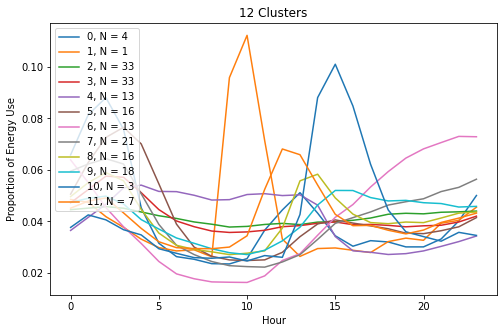

Num vals in 0: 8
Num vals in 1: 12
Num vals in 2: 32
Num vals in 3: 8
Num vals in 4: 1
Num vals in 5: 43
Num vals in 6: 16
Num vals in 7: 13
Num vals in 8: 7
Num vals in 9: 12
Num vals in 10: 5
Num vals in 11: 9
Num vals in 12: 12


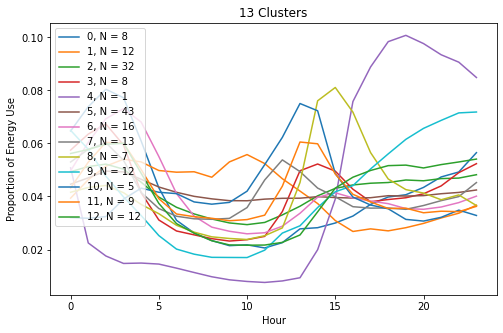

Num vals in 0: 21
Num vals in 1: 11
Num vals in 2: 27
Num vals in 3: 8
Num vals in 4: 1
Num vals in 5: 34
Num vals in 6: 13
Num vals in 7: 11
Num vals in 8: 7
Num vals in 9: 12
Num vals in 10: 5
Num vals in 11: 9
Num vals in 12: 15
Num vals in 13: 4


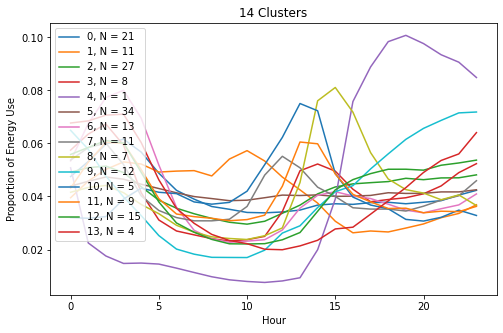

Num vals in 0: 47
Num vals in 1: 9
Num vals in 2: 11
Num vals in 3: 11
Num vals in 4: 15
Num vals in 5: 9
Num vals in 6: 1
Num vals in 7: 22
Num vals in 8: 10
Num vals in 9: 7
Num vals in 10: 16
Num vals in 11: 3
Num vals in 12: 12
Num vals in 13: 1
Num vals in 14: 4


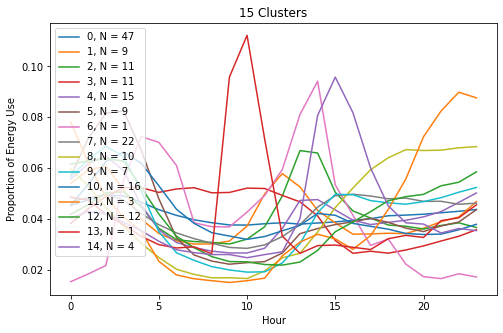

In [12]:
# Plot only the cluster centers
info_df = pd.DataFrame()
for n_clusters in range(3, 16):
    km = KMeans(n_clusters=n_clusters, init='random', n_init=30, max_iter=500, random_state=0)
    y_km = km.fit_predict(X_norm)

    info_df.loc[n_clusters, 'inertia'] = km.inertia_
    info_df.loc[n_clusters, 'logscore'] = np.log(-km.score(X_norm))
    info_df.loc[n_clusters, 'silscore'] = metrics.silhouette_score(X_norm, y_km)

    plt.figure(figsize=(8,5))
    for i in list(set(km.labels_)):
        print(f"Num vals in {i}: {sum(km.labels_ == i)}")
        plt.plot(
            km.cluster_centers_[i],
            label=f'{i}, N = {sum(km.labels_ == i)}'
        )

    plt.legend(scatterpoints=1)
    plt.title(f"{n_clusters} Clusters")
    plt.ylabel("Proportion of Energy Use")
    plt.xlabel("Hour")
    plt.legend(loc='upper left')
    plt.show()

     inertia  logscore  silscore
3   0.328292 -1.113853  0.191176
4   0.286366 -1.250485  0.200582
5   0.256335 -1.361271  0.232208
6   0.233602 -1.454135  0.198142
7   0.214748 -1.538291  0.187395
8   0.202068 -1.599149  0.166804
9   0.191679 -1.651933  0.154053
10  0.182516 -1.700916  0.158792
11  0.174091 -1.748176  0.166210
12  0.166591 -1.792215  0.164665
13  0.159702 -1.834446  0.162880
14  0.152319 -1.881778  0.165425
15  0.147540 -1.913655  0.173616


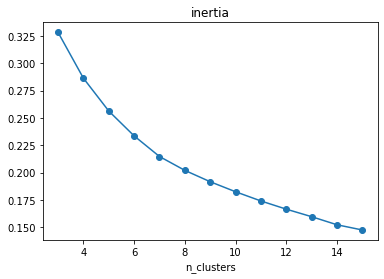

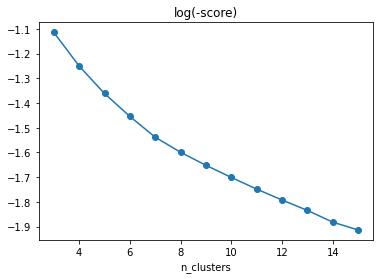

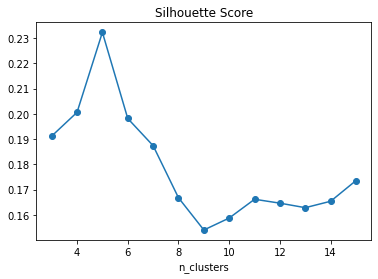

In [13]:
print(info_df)
plt.plot(info_df.index, info_df['inertia'], marker='o')
plt.title('inertia')
plt.xlabel('n_clusters')
plt.show()

plt.plot(info_df.index, info_df['logscore'], marker='o')
plt.title('log(-score)')
plt.xlabel('n_clusters')
plt.show()

plt.plot(info_df.index, info_df['silscore'], marker='o')
plt.title('Silhouette Score')
plt.xlabel('n_clusters')
plt.show()

     inertia  logscore  silscore
3   0.041926  0.136633 -0.009406
4   0.030031  0.110786 -0.031626
5   0.022732  0.092863  0.034065
6   0.018855  0.084156  0.010747
7   0.012679  0.060859  0.020591
8   0.010389  0.052784  0.012751
9   0.009163  0.048983 -0.004739
10  0.008425  0.047260 -0.007418
11  0.007500  0.044039  0.001545
12  0.006889  0.042231  0.001785
13  0.007383  0.047332 -0.002545
14  0.004779  0.031878 -0.008190
15       NaN       NaN       NaN


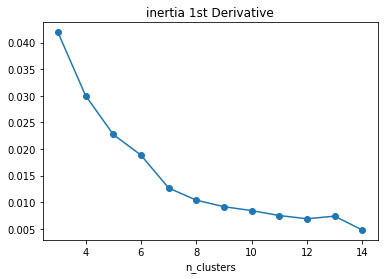

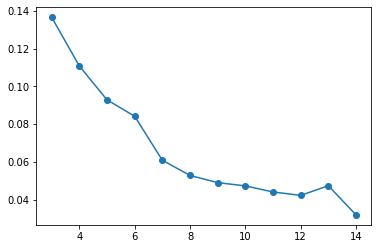

In [14]:
# info_diff_df = (info_df.diff(-2) + info_df.diff(-1)) / 2
info_diff_df = info_df.diff(-1)
print(info_diff_df)
plt.plot(info_diff_df.index, info_diff_df['inertia'], marker='o')
plt.title('inertia 1st Derivative')
plt.xlabel('n_clusters')
plt.show()
plt.plot(info_diff_df.index, info_diff_df['logscore'], marker='o')
plt.show()

     inertia  logscore  silscore
3   0.011895  0.025846  0.022219
4   0.007299  0.017923 -0.065691
5   0.003878  0.008707  0.023318
6   0.006175  0.023297 -0.009844
7   0.002290  0.008075  0.007840
8   0.001227  0.003801  0.017490
9   0.000738  0.001723  0.002679
10  0.000925  0.003221 -0.008963
11  0.000612  0.001808 -0.000240
12 -0.000494 -0.005101  0.004330
13  0.002604  0.015454  0.005645
14       NaN       NaN       NaN
15       NaN       NaN       NaN


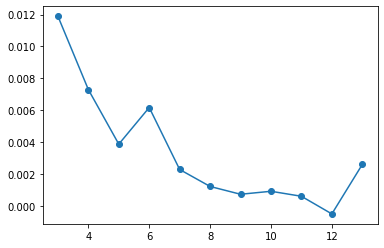

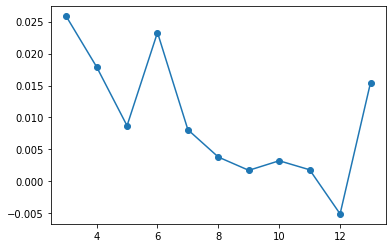

In [15]:
info_d2_df = info_df.diff(-1) - info_df.shift(-1).diff(-1)
print(info_d2_df)
plt.plot(info_d2_df.index, info_d2_df['inertia'], marker='o')
plt.show()
plt.plot(info_d2_df.index, info_d2_df['logscore'], marker='o')
plt.show()

0    0.168839
1    0.007671
2    0.089603
3    0.192634
4    0.303765
5    0.110310
Name: Cluster #, dtype: float64


<BarContainer object of 6 artists>

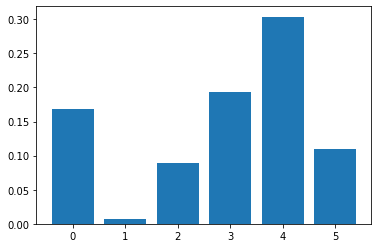

In [16]:
print(silscore_by_cluster)
plt.bar(silscore_by_cluster.index, silscore_by_cluster.values)